IMPORTING DATASET 

In [1]:
# basic python 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pickle



# torch functions 
import torch   #pytorch package
import torchvision # load dataset
from torch.utils.data import  Dataset


import torchvision.transforms as transforms
from torch.utils.data import random_split

#neural network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim   #optimizer
from torchvision.utils import make_grid
from torchsummary import summary
import torch.optim as optim



import torch


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda', index=0)

Load Datset

In [7]:
def dataset_loader():
    
    
    
    transform= transforms.Compose(   # the transformations to be applied to the 
        [transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
    )




    trainset=torchvision.datasets.CIFAR10(root="./data",
    download=True,
    train=True,transform=transform)


    
    torch.manual_seed(43)
    val_size = 5000
    train_size = len(trainset) - val_size
    train_ds, val_ds = random_split(trainset, [train_size, val_size])
    

    testset=torchvision.datasets.CIFAR10(root="./data",
    download=True,
    train=False,transform=transform)
    
    torch.manual_seed(43)
    val_size = 5000
    train_size = len(trainset) - val_size
    train_ds, val_ds = random_split(trainset, [train_size, val_size])



    batchSize=4
    valSize=2000
    trainloader=torch.utils.data.DataLoader(train_ds,batch_size=batchSize,shuffle= True,num_workers=2)
    validationloader=torch.utils.data.DataLoader(val_ds,batch_size=batchSize,shuffle= True,num_workers=2)
    testloader=torch.utils.data.DataLoader(testset,batch_size=batchSize,shuffle=True,num_workers=2)

    return trainloader,validationloader,testloader

In [7]:
def dataset_loader_alex():   #AlexNet Data Loaded
    transform_alex=transforms.Compose(
    [transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),]
    )


    trainset=torchvision.datasets.CIFAR10(root="./data",
    download=True,
    train=True,transform=transform_alex)


    torch.manual_seed(43)
    val_size = 5000
    train_size = len(trainset) - val_size
    train_ds, val_ds = random_split(trainset, [train_size, val_size])


    testset=torchvision.datasets.CIFAR10(root="./data",
    download=True,
    train=False,transform=transform_alex  )

    batchSize=4
    valSize=2000
    trainloader=torch.utils.data.DataLoader(train_ds,batch_size=batchSize,shuffle= True,num_workers=2)
    validationloader=torch.utils.data.DataLoader(val_ds,batch_size=batchSize,shuffle= True,num_workers=2)
    testloader=torch.utils.data.DataLoader(testset,batch_size=batchSize,shuffle=True,num_workers=2)

    return trainloader,validationloader,testloader
    

In [ ]:
trainloader_alex=torch.utils.data.DataLoader(train_ds,batch_size=batchSize,shuffle= True,num_workers=2)
validationloader_alex=torch.utils.data.DataLoader(val_ds,batch_size=batchSize,shuffle= True,num_workers=2)
testloader_alex=torch.utils.data.DataLoader(testset,batch_size=batchSize,shuffle=True,num_workers=2)

See the images

See Whats Inside

In [28]:
def imshow(img):
    # img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(np.img,(1,2,0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


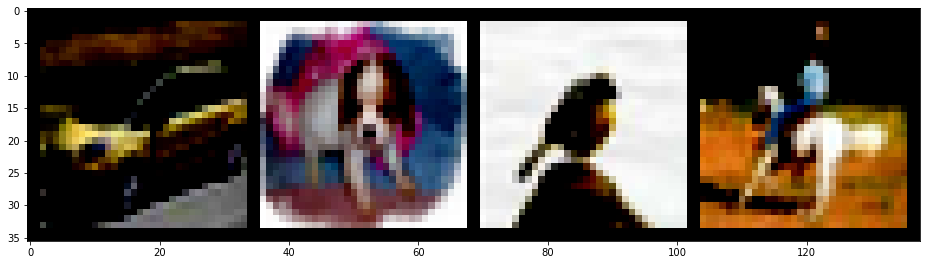

In [29]:
for images,labels in trainloader:
    fi,ax=plt.subplots(figsize=(16,12))
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

Define a Convolution Network Batch Normalized Network


In [7]:
import torch.nn as nn
from torch.nn import functional as F

class BatchNormalisation(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_layer=nn.Sequential(
            
            
            nn.Conv2d(3,32,3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
          
            
            nn.Conv2d(32,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            
            nn.Conv2d(128,128,3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            
            nn.Conv2d(128,64,3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            
            nn.Flatten(),
            nn.Linear(64*4*4,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,10)
            
            )
      
  
    def forward(self, x):
        x=self.cnn_layer(x)
        return(x)
        
    
    def diagnostics(self,batch):
        correct = 0
        total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            loss_batch=[]
            for data in batch:
                images, labels = data[0].to(device),data[1].to(device)
                # calculate outputs by running images through the network
                outputs = self.forward(images)
                # the class with the highest energy is what we choose as prediction
                predicted = torch.argmax(outputs.data, 1)
                total += labels.size(0)
                correct += torch.sum(predicted == labels).sum().item()
                # loss calculation 
                loss_batch.append(F.cross_entropy(outputs, labels))
                
        #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
        loss_batch_mean=torch.stack(loss_batch).mean()      
        accuracy=100 * correct /total
        return loss_batch_mean,accuracy

batch_cnn = BatchNormalisation()

summary(batch_cnn,(3,32,32))


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─BatchNorm2d: 2-2                  [-1, 32, 32, 32]          64
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-5                       [-1, 128, 16, 16]         36,992
|    └─BatchNorm2d: 2-6                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-7                         [-1, 128, 16, 16]         --
|    └─MaxPool2d: 2-8                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           147,584
|    └─BatchNorm2d: 2-10                 [-1, 128, 8, 8]           256
|    └─ReLU: 2-11                        [-1, 128, 8, 8]           --
|    └─Conv2d: 2-12                      [-1, 64, 8, 8]            73,792

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─BatchNorm2d: 2-2                  [-1, 32, 32, 32]          64
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-5                       [-1, 128, 16, 16]         36,992
|    └─BatchNorm2d: 2-6                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-7                         [-1, 128, 16, 16]         --
|    └─MaxPool2d: 2-8                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           147,584
|    └─BatchNorm2d: 2-10                 [-1, 128, 8, 8]           256
|    └─ReLU: 2-11                        [-1, 128, 8, 8]           --
|    └─Conv2d: 2-12                      [-1, 64, 8, 8]            73,792

Define a Convolution Network Base CNN Network


In [9]:
class BaseCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_layer=nn.Sequential(
            
            
            nn.Conv2d(3,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
          
            
            nn.Conv2d(32,128,3,padding=1),
          
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            
            nn.Conv2d(128,128,3,padding=1),
           
            nn.ReLU(),
            
            
            nn.Conv2d(128,64,3,padding=1),
            
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            
            nn.Flatten(),
            nn.Linear(64*4*4,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,10)
            
            )
      
  
    def forward(self, x):
        x=self.cnn_layer(x)
        return(x)
        
    
    def diagnostics(self,batch):
        correct = 0
        total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            loss_batch=[]
            for data in batch:
                images, labels = data[0].to(device),data[1].to(device)
                # calculate outputs by running images through the network
                outputs = self.forward(images)
                # the class with the highest energy is what we choose as prediction
                predicted = torch.argmax(outputs.data, 1)
                total += labels.size(0)
                correct += torch.sum(predicted == labels).sum().item()
                # loss calculation 
                loss_batch.append(F.cross_entropy(outputs, labels))
                
        #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
        loss_batch_mean=torch.stack(loss_batch).mean()      
        accuracy=100 * correct /total
        return loss_batch_mean,accuracy

base_cnn = BaseCNN()

summary(base_cnn,(3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         36,992
|    └─ReLU: 2-5                         [-1, 128, 16, 16]         --
|    └─MaxPool2d: 2-6                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─ReLU: 2-8                         [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 64, 8, 8]            73,792
|    └─ReLU: 2-10                        [-1, 64, 8, 8]            --
|    └─MaxPool2d: 2-11                   [-1, 64, 4, 4]            --
|    └─Flatten: 2-12                     [-1, 1024]                --
|

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         36,992
|    └─ReLU: 2-5                         [-1, 128, 16, 16]         --
|    └─MaxPool2d: 2-6                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─ReLU: 2-8                         [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 64, 8, 8]            73,792
|    └─ReLU: 2-10                        [-1, 64, 8, 8]            --
|    └─MaxPool2d: 2-11                   [-1, 64, 4, 4]            --
|    └─Flatten: 2-12                     [-1, 1024]                --
|

Define a Convolution Network With  Sigmoid Activation Function Network


In [14]:
class Activation_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_layer=nn.Sequential(
            
            
            nn.Conv2d(3,32,3,padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(2,2),
          
            
            nn.Conv2d(32,128,3,padding=1),
          
            nn.Sigmoid(),
            nn.MaxPool2d(2,2),
            
            
            nn.Conv2d(128,128,3,padding=1),
           
            nn.Sigmoid(),
            
            
            nn.Conv2d(128,64,3,padding=1),
            
            nn.Sigmoid(),
            nn.MaxPool2d(2,2),
            
            
            nn.Flatten(),
            nn.Linear(64*4*4,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,10)
            
            )
      
  
    def forward(self, x):
        x=self.cnn_layer(x)
        return(x)
        
    
    def diagnostics(self,batch):
        correct = 0
        total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            loss_batch=[]
            for data in batch:
                images, labels = data[0].to(device),data[1].to(device)
                # calculate outputs 
                #running images through the network
                outputs = self.forward(images)
                # the class with the highest energy is what we choose as prediction
                predicted = torch.argmax(outputs.data, 1)
                total += labels.size(0)
                correct += torch.sum(predicted == labels).sum().item()
                # loss calculation 
                loss_batch.append(F.cross_entropy(outputs, labels))
                
        #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
        loss_batch_mean=torch.stack(loss_batch).mean()      
        accuracy=100 * correct /total
        return loss_batch_mean,accuracy

act_pool = Activation_CNN()
summary(act_pool,(3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─Sigmoid: 2-2                      [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         36,992
|    └─Sigmoid: 2-5                      [-1, 128, 16, 16]         --
|    └─MaxPool2d: 2-6                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─Sigmoid: 2-8                      [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 64, 8, 8]            73,792
|    └─Sigmoid: 2-10                     [-1, 64, 8, 8]            --
|    └─MaxPool2d: 2-11                   [-1, 64, 4, 4]            --
|    └─Flatten: 2-12                     [-1, 1024]                --
|

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─Sigmoid: 2-2                      [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         36,992
|    └─Sigmoid: 2-5                      [-1, 128, 16, 16]         --
|    └─MaxPool2d: 2-6                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─Sigmoid: 2-8                      [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 64, 8, 8]            73,792
|    └─Sigmoid: 2-10                     [-1, 64, 8, 8]            --
|    └─MaxPool2d: 2-11                   [-1, 64, 4, 4]            --
|    └─Flatten: 2-12                     [-1, 1024]                --
|

Define a Convolution Network Batch With Average Pooling Network


In [21]:
class AvgPool_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_layer=nn.Sequential(
            
            
            nn.Conv2d(3,32,3,padding=1),
            nn.ReLU(),
            nn.AvgPool2d(2,2),
          
            
            nn.Conv2d(32,128,3,padding=1),
          
            nn.ReLU(),
            nn.AvgPool2d(2,2),
            
            
            nn.Conv2d(128,128,3,padding=1),
           
            nn.ReLU(),
            
            
            nn.Conv2d(128,64,3,padding=1),
            
            nn.ReLU(),
            nn.AvgPool2d(2,2),
            
            
            nn.Flatten(),
            nn.Linear(64*4*4,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,10)
            
            )
      
  
    def forward(self, x):
        x=self.cnn_layer(x)
        return(x)
        
    
    def diagnostics(self,batch):
        correct = 0
        total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            loss_batch=[]
            for data in batch:
                images, labels = data[0].to(device),data[1].to(device)
                # calculate outputs 
                #running images through the network
                outputs = self.forward(images)
                # the class with the highest energy is what we choose as prediction
                predicted = torch.argmax(outputs.data, 1)
                total += labels.size(0)
                correct += torch.sum(predicted == labels).sum().item()
                # loss calculation 
                loss_batch.append(F.cross_entropy(outputs, labels))
                
        #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
        loss_batch_mean=torch.stack(loss_batch).mean()      
        accuracy=100 * correct /total
        return loss_batch_mean,accuracy

avg_pool = AvgPool_CNN()
summary(avg_pool,(3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─AvgPool2d: 2-3                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         36,992
|    └─ReLU: 2-5                         [-1, 128, 16, 16]         --
|    └─AvgPool2d: 2-6                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─ReLU: 2-8                         [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 64, 8, 8]            73,792
|    └─ReLU: 2-10                        [-1, 64, 8, 8]            --
|    └─AvgPool2d: 2-11                   [-1, 64, 4, 4]            --
|    └─Flatten: 2-12                     [-1, 1024]                --
|

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          896
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─AvgPool2d: 2-3                    [-1, 32, 16, 16]          --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         36,992
|    └─ReLU: 2-5                         [-1, 128, 16, 16]         --
|    └─AvgPool2d: 2-6                    [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─ReLU: 2-8                         [-1, 128, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 64, 8, 8]            73,792
|    └─ReLU: 2-10                        [-1, 64, 8, 8]            --
|    └─AvgPool2d: 2-11                   [-1, 64, 4, 4]            --
|    └─Flatten: 2-12                     [-1, 1024]                --
|

In [11]:
def test(testloader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device),data[1].to(device)
            # calculate outputs by running images through the network
            outputs = batch_cnn(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [11]:
def train(model,trainloader,validationloader):
    validation_accuracy=[]
    validation_loss=[]
    training_loss=[]
    training_accuracy=[]
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


    for epoch in range(10):  # loop over the dataset multiple times
        running_loss = 0.0
        batch_train_loss=0.0
        batch_accuracy=[]
        batch_loss=[]
        total=0
        correct=0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device),data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model.forward(inputs)
            
            predicted = torch.max(outputs.data, 1)
    #         print(predicted)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            predicted = torch.argmax(outputs.data, 1)
            total += labels.size(0)
            correct += torch.sum(predicted == labels).item()
            # print statistics
            running_loss += loss.item()
            batch_train_loss+=loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0
        
        
            batch_accuracy.append(correct/total)
            batch_loss.append(batch_train_loss/total)
            
        train_accuracy=sum(batch_accuracy)/len(batch_accuracy)
        train_loss=sum(batch_loss)/len(batch_loss)
        
        val_loss,val_accuracy=model.diagnostics(validationloader)
        validation_loss.append(val_loss)
        validation_accuracy.append(val_accuracy)
        
        training_loss.append(train_loss)
        training_accuracy.append(train_accuracy)
    
    
    #     training_loss.append(train_loss)
    #     train_accuracy.append(train_acc)
        
        print(f'[{epoch + 1},{i + 1:5d}] train loss: {train_loss:.3f} validation loss: {val_loss:.3f} validation accuracy: {val_accuracy}')
        
    print('Finished Training')
    return training_loss,training_accuracy,validation_loss,validation_accuracy

In [ ]:
trainloader,validationloader,testloader=dataset_loader()
training_loss,training_accuracy,validation_loss,validation_accuracy=train(base_cnn,trainloader,validationloader)

Diagnostic Charts


In [19]:
def plot_data_loss(train_loss,val_loss):
    plt.plot(train_loss, label='train loss')
    val=[i.tolist() for i in val_loss]
    plt.plot(val,label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');
    plt.legend()
    plt.grid()
# Show the plot
    plt.show()
def plot_data_acc(train_acc,val_acc):
    train_acc=[i*100 for i in train_acc]
    plt.plot( train_acc,label='train accuracy' )
    plt.plot(val_acc, label='validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy  vs. No. of epochs');
    plt.legend()
    plt.grid()
# Show the plot
    plt.show()

In [ ]:
## Base CNN Model Training & Validation Accuracy and Loss 

In [ ]:
plot_data_acc(training_accuracy,validation_accuracy)



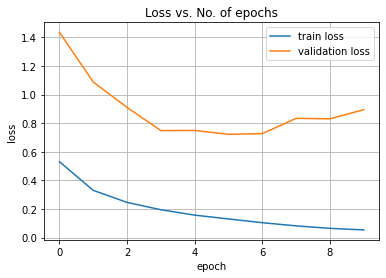

In [34]:
plot_data_loss(training_loss,validation_loss)

In [ ]:
## Batch Normalized CNN Model Training & Validation Accuracy and Loss 

In [35]:
trainloader,validationloader,testloader=dataset_loader()
training_loss_batch,training_accuracy_batch,validation_loss_batch,validation_accuracy_batch=train(batch_cnn,trainloader,validationloader)

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.753
[1,  4000] loss: 1.401
[1,  6000] loss: 1.272
[1,  8000] loss: 1.152
[1, 10000] loss: 1.096
[1,11250] train loss: 0.388 validation loss: 1.149 validation accuracy: 59.88
[2,  2000] loss: 0.954
[2,  4000] loss: 0.915
[2,  6000] loss: 0.898
[2,  8000] loss: 0.872
[2, 10000] loss: 0.837
[2,11250] train loss: 0.233 validation loss: 0.825 validation accuracy: 71.7
[3,  2000] loss: 0.735
[3,  4000] loss: 0.734
[3,  6000] loss: 0.709
[3,  8000] loss: 0.716
[3, 10000] loss: 0.695
[3,11250] train loss: 0.182 validation loss: 0.750 validation accuracy: 74.2
[4,  2000] loss: 0.583
[4,  4000] loss: 0.593
[4,  6000] loss: 0.600
[4,  8000] loss: 0.595
[4, 10000] loss: 0.588
[4,11250] train loss: 0.148 validation loss: 0.724 validation accuracy: 74.82
[5,  2000] loss: 0.472
[5,  4000] loss: 0.503
[5,  6000] loss: 0.518
[5,  8000] loss: 0.493
[5, 10000] loss: 0.504
[5,11250] train loss: 0.123 validation 

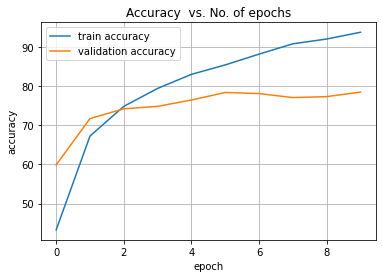

In [36]:
plot_data_acc(training_accuracy_batch,validation_accuracy_batch)

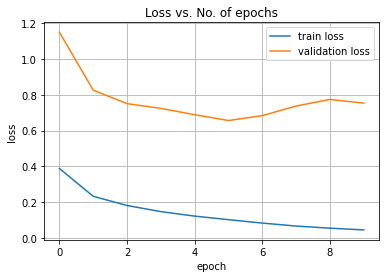

In [37]:
plot_data_loss(training_loss_batch,validation_loss_batch)

In [ ]:
# CNN Model with Average Pooling Layer

In [22]:
trainloader,validationloader,testloader=dataset_loader()
training_loss_avg,training_accuracy_avg,validation_loss_avg,validation_accuracy_avg=train(avg_pool,trainloader,validationloader)

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.303
[1,  4000] loss: 2.291
[1,  6000] loss: 2.044
[1,  8000] loss: 1.898
[1, 10000] loss: 1.815
[1,11250] train loss: 0.552 validation loss: 1.679 validation accuracy: 37.26
[2,  2000] loss: 1.633
[2,  4000] loss: 1.574
[2,  6000] loss: 1.523
[2,  8000] loss: 1.448
[2, 10000] loss: 1.408
[2,11250] train loss: 0.395 validation loss: 1.494 validation accuracy: 45.3
[3,  2000] loss: 1.347
[3,  4000] loss: 1.307
[3,  6000] loss: 1.256
[3,  8000] loss: 1.257
[3, 10000] loss: 1.220
[3,11250] train loss: 0.327 validation loss: 1.242 validation accuracy: 55.84
[4,  2000] loss: 1.124
[4,  4000] loss: 1.123
[4,  6000] loss: 1.104
[4,  8000] loss: 1.049
[4, 10000] loss: 1.045
[4,11250] train loss: 0.279 validation loss: 1.032 validation accuracy: 62.46
[5,  2000] loss: 0.945
[5,  4000] loss: 0.955
[5,  6000] loss: 0.961
[5,  8000] loss: 0.902
[5, 10000] loss: 0.925
[5,11250] train loss: 0.237 validation

In [ ]:
plot_data_acc(training_accuracy_avg,validation_accuracy_avg)
plot_data_loss(training_loss_avg,validation_loss_avg)


In [16]:
trainloader,validationloader,testloader=dataset_loader()
training_loss_act,training_accuracy_act,validation_loss_act,validation_accuracy_act=train(act_pool,trainloader,validationloader)

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1,11250] train loss: 0.576 validation loss: 2.303 validation accuracy: 9.96
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2,11250] train loss: 0.576 validation loss: 2.304 validation accuracy: 9.96
[3,  2000] loss: 2.304
[3,  4000] loss: 2.303
[3,  6000] loss: 2.303
[3,  8000] loss: 2.303
[3, 10000] loss: 2.303
[3,11250] train loss: 0.576 validation loss: 2.303 validation accuracy: 10.68
[4,  2000] loss: 2.303
[4,  4000] loss: 2.303
[4,  6000] loss: 2.303
[4,  8000] loss: 2.303
[4, 10000] loss: 2.303
[4,11250] train loss: 0.576 validation loss: 2.303 validation accuracy: 9.96
[5,  2000] loss: 2.304
[5,  4000] loss: 2.303
[5,  6000] loss: 2.303
[5,  8000] loss: 2.304
[5, 10000] loss: 2.303
[5,11250] train loss: 0.576 validation l

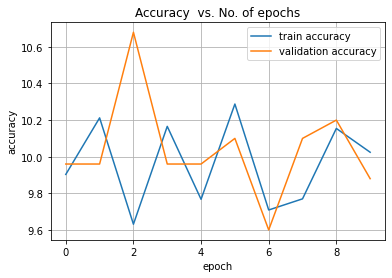

In [19]:
plot_data_acc(training_accuracy_act,validation_accuracy_act)

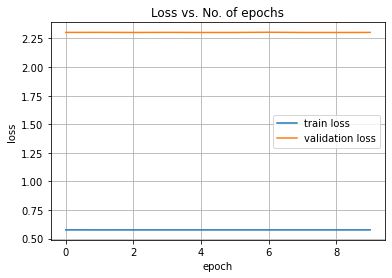

In [20]:
plot_data_loss(training_loss_act,validation_loss_act)


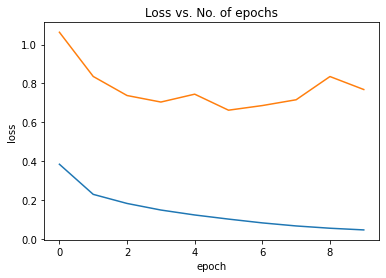

In [97]:
plot_data_loss(training_loss_batch,validation_loss_batch)

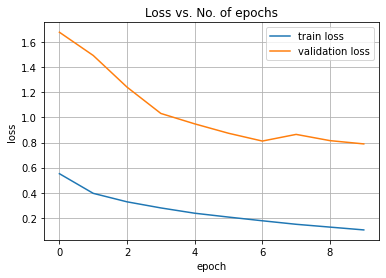

In [24]:
plot_data_loss(training_loss_avg,validation_loss_avg)

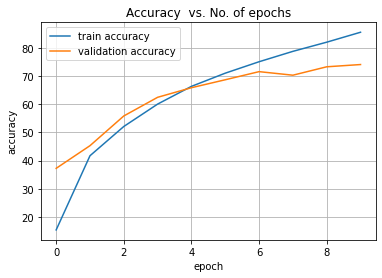

In [26]:
plot_data_acc(training_accuracy_avg,validation_accuracy_avg)

AlexNet Initialization

In [9]:
Alex_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
Alex_model.classifier[4]=nn.Linear(4096,1024)
Alex_model.classifier[6]=nn.Linear(1024,10)

Using cache found in /home/namratab/.cache/torch/hub/pytorch_vision_v0.10.0
/home/namratab/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/namratab/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
# Alex_model.eval()
Alex_model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [11]:
optimizer=optim.SGD(Alex_model.parameters(),lr=0.01,momentum=0.9)

In [12]:
Alex_model.eval()


optimizer = optim.SGD(Alex_model.parameters(),lr=0.001,momentum=0.9)
loss_func = nn.CrossEntropyLoss()

Alex_model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
trainloader,validationloader,testloader=dataset_loader_alex()
training_loss_act,training_accuracy_act,validation_loss_act,validation_accuracy_act=train_alex(Alex_model,trainloader,validationloader)

In [16]:
def diagnostic_alex(model,batch):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        loss_batch=[]
        for data in batch:
            images, labels = data[0].to(device),data[1].to(device)
            # calculate outputs 
            #running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            predicted = torch.argmax(outputs.data, 1)
            total += labels.size(0)
            correct += torch.sum(predicted == labels).sum().item()
            # loss calculation 
            loss_batch.append(F.cross_entropy(outputs, labels))
                
        #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
        loss_batch_mean=torch.stack(loss_batch).mean()      
        accuracy=100 * correct /total
        return loss_batch_mean,accuracy

    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // class} %')

In [17]:
def train_alex(model,trainloader,validationloader):
    validation_accuracy=[]
    validation_loss=[]
    training_loss=[]
    training_accuracy=[]
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


    for epoch in range(5):  # loop over the dataset multiple times
        running_loss = 0.0
        batch_train_loss=0.0
        batch_accuracy=[]
        batch_loss=[]
        total=0
        correct=0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device),data[1].to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            
            predicted = torch.max(outputs.data, 1)
    #         print(predicted)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            predicted = torch.argmax(outputs.data, 1)
            total += labels.size(0)
            correct += torch.sum(predicted == labels).item()
            # print statistics
            running_loss += loss.item()
            batch_train_loss+=loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0
        
        
            batch_accuracy.append(correct/total)
            batch_loss.append(batch_train_loss/total)
            
        train_accuracy=sum(batch_accuracy)/len(batch_accuracy)
        train_loss=sum(batch_loss)/len(batch_loss)
        
        val_loss,val_accuracy=diagnostic_alex(Alex_model,validationloader)
        validation_loss.append(val_loss)
        validation_accuracy.append(val_accuracy)
        
        training_loss.append(train_loss)
        training_accuracy.append(train_accuracy)
    
    
    #     training_loss.append(train_loss)
    #     train_accuracy.append(train_acc)
        
        print(f'[{epoch + 1},{i + 1:5d}] train loss: {train_loss:.3f} validation loss: {val_loss:.3f} validation accuracy: {val_accuracy}')
        
    print('Finished Training')
    return training_loss,training_accuracy,validation_loss,validation_accuracy

In [18]:
trainloader_alex,validation_alex,test_laoder=dataset_loader_alex()
training_loss,training_accuracy,validation_loss,validation_accuracy=train_alex(Alex_model,trainloader_alex,validation_alex)

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 0.074
[1,  4000] loss: 0.077
[1,  6000] loss: 0.076
[1,  8000] loss: 0.091
[1, 10000] loss: 0.088
[1,11250] train loss: 0.019 validation loss: 0.997 validation accuracy: 80.0
[2,  2000] loss: 0.067
[2,  4000] loss: 0.084
[2,  6000] loss: 0.091
[2,  8000] loss: 0.080
[2, 10000] loss: 0.073
[2,11250] train loss: 0.019 validation loss: 0.717 validation accuracy: 84.34
[3,  2000] loss: 0.056
[3,  4000] loss: 0.059
[3,  6000] loss: 0.081
[3,  8000] loss: 0.079
[3, 10000] loss: 0.077
[3,11250] train loss: 0.015 validation loss: 0.853 validation accuracy: 81.6
[4,  2000] loss: 0.059
[4,  4000] loss: 0.059
[4,  6000] loss: 0.086
[4,  8000] loss: 0.076
[4, 10000] loss: 0.055
[4,11250] train loss: 0.016 validation loss: 0.966 validation accuracy: 80.94
[5,  2000] loss: 0.056
[5,  4000] loss: 0.048
[5,  6000] loss: 0.076
[5,  8000] loss: 0.081
[5, 10000] loss: 0.070
[5,11250] train loss: 0.015 validation 

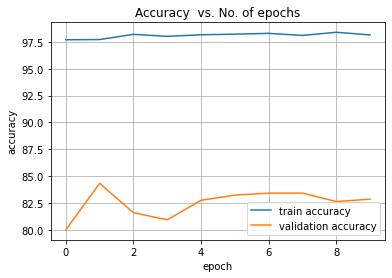

In [20]:
plot_data_acc(training_accuracy,validation_accuracy)

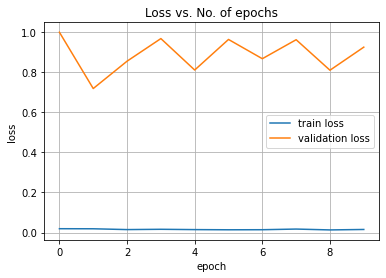

In [21]:
plot_data_loss(training_loss,validation_loss)

In [35]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
diagnostic_alex(Alex_model,testloader)

(tensor(0.8679, device='cuda:0'), 83.2)